In [83]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import os
from pandas.tools.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Energy consumption csv file located on PUIDATA
nrg = gp.GeoDataFrame.from_csv(os.getenv("PUIDATA")+
                               "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [3]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,Site EUI(kBtu/ft2),...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
Record Number,,,,,,,,,,,,,,,,,,,,,
12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,NaN,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,NaN,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,NaN,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,NaN,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [4]:
nrg.columns

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [ ]:
#drop columns of unnecessary data, practice using the indexing method vs. names of columns
nrg.drop(nrg.columns[[1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,21,22,23]],
         axis=1, inplace=True)
nrg.columns

In [5]:
#Manhattan PLUTO data
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA")+"/Manhattan/MNMapPLUTO.shp")
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [6]:
#remove unnecessary data and confirm correct columns retained
bsize.drop([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot', 
            u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010', u'Version',     u'XCoord', 
            u'YCoord', u'YearAlter1', u'YearAlter2',  u'YearBuilt', 
            u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis=1, inplace=True)
bsize.columns

Index([u'BBL', u'UnitsRes', u'UnitsTotal'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b9c553d50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4b59774c10>]], dtype=object)

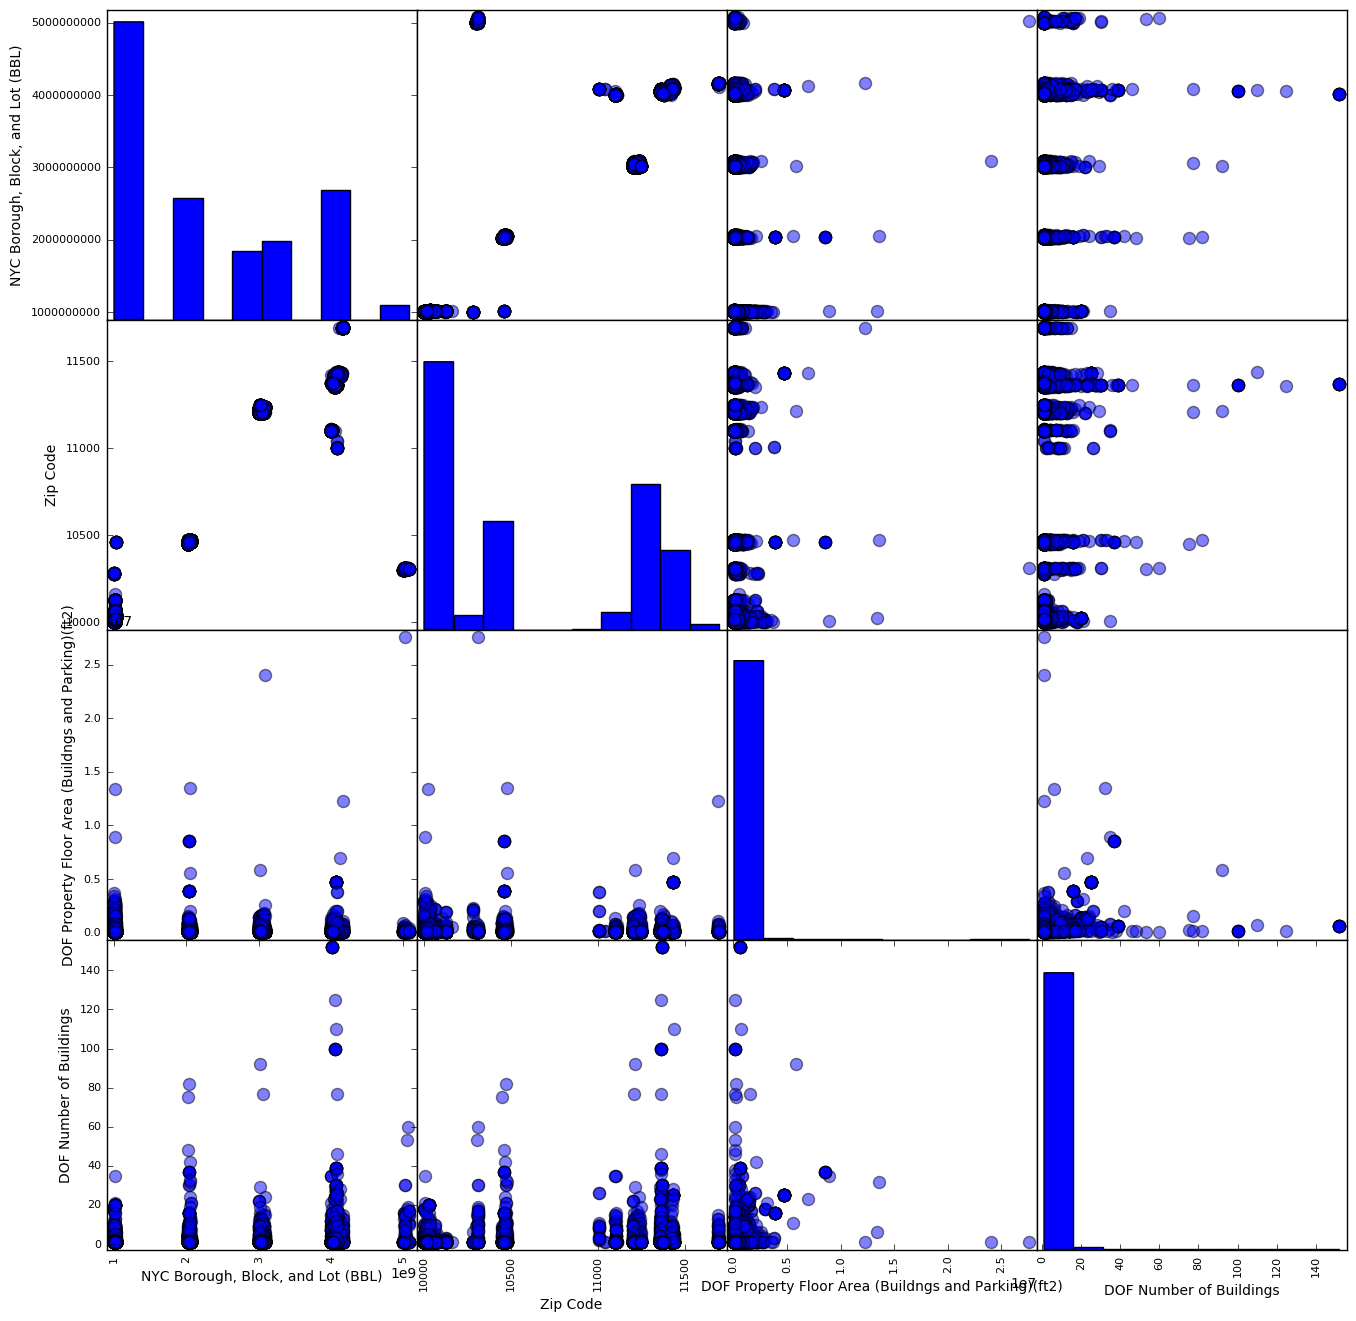

In [7]:
scatter_matrix (nrg, s=300, figsize=(16, 16))

### Figure 1. Scatter Matrix of All Numerical Values From Energy Comsumption Data

In [8]:
#using the to_numeric function to convert values, coerece sets errors to NaN values
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors = 'coerce')
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(nrg[
        'Reported Property Floor Area (Building(s)) (ft²)'], errors = 'coerce')

In [19]:
#checking to make sure NaN values are set
print (nrg['Site EUI(kBtu/ft2)'].astype(float))

Record Number
12086      NaN
14354      NaN
12150      NaN
12590      NaN
15591      NaN
12135      NaN
8523       NaN
15920      NaN
14241      NaN
15925      NaN
9685       NaN
7540       NaN
14360      NaN
10588      NaN
14423      NaN
12515      NaN
3028     125.4
14609      NaN
12096      NaN
6666       NaN
8914       NaN
11586      NaN
11714      NaN
14307      NaN
12761      NaN
12091      NaN
16027      NaN
13378      NaN
14911      NaN
15103      NaN
         ...  
14559      NaN
14560      NaN
14748      NaN
14753      NaN
13582      NaN
13947      NaN
14777      NaN
14779      NaN
14409      NaN
13262      NaN
13261      NaN
12523      NaN
12529      NaN
12536      NaN
13929      NaN
13944      NaN
13945      NaN
13821      NaN
13829      NaN
13837      NaN
13838      NaN
13847      NaN
14352      NaN
12976      NaN
12978      NaN
12984      NaN
12987      NaN
12988      NaN
13472      NaN
13482      NaN
Name: Site EUI(kBtu/ft2), dtype: float64


In [20]:
#checking to make sure NaN values are set
bsize.BBL.astype(float)

0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [10]:
#rename column to create common value for merging 
nrg.rename(columns={'NYC Borough, Block, and Lot (BBL)': 'BBL'}, inplace = True)
#merging the two datasets 
bblnrgdata = pd.merge(nrg, bsize, on = ['BBL'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b590a4790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4b1e3c05d0>]], dtype=object)

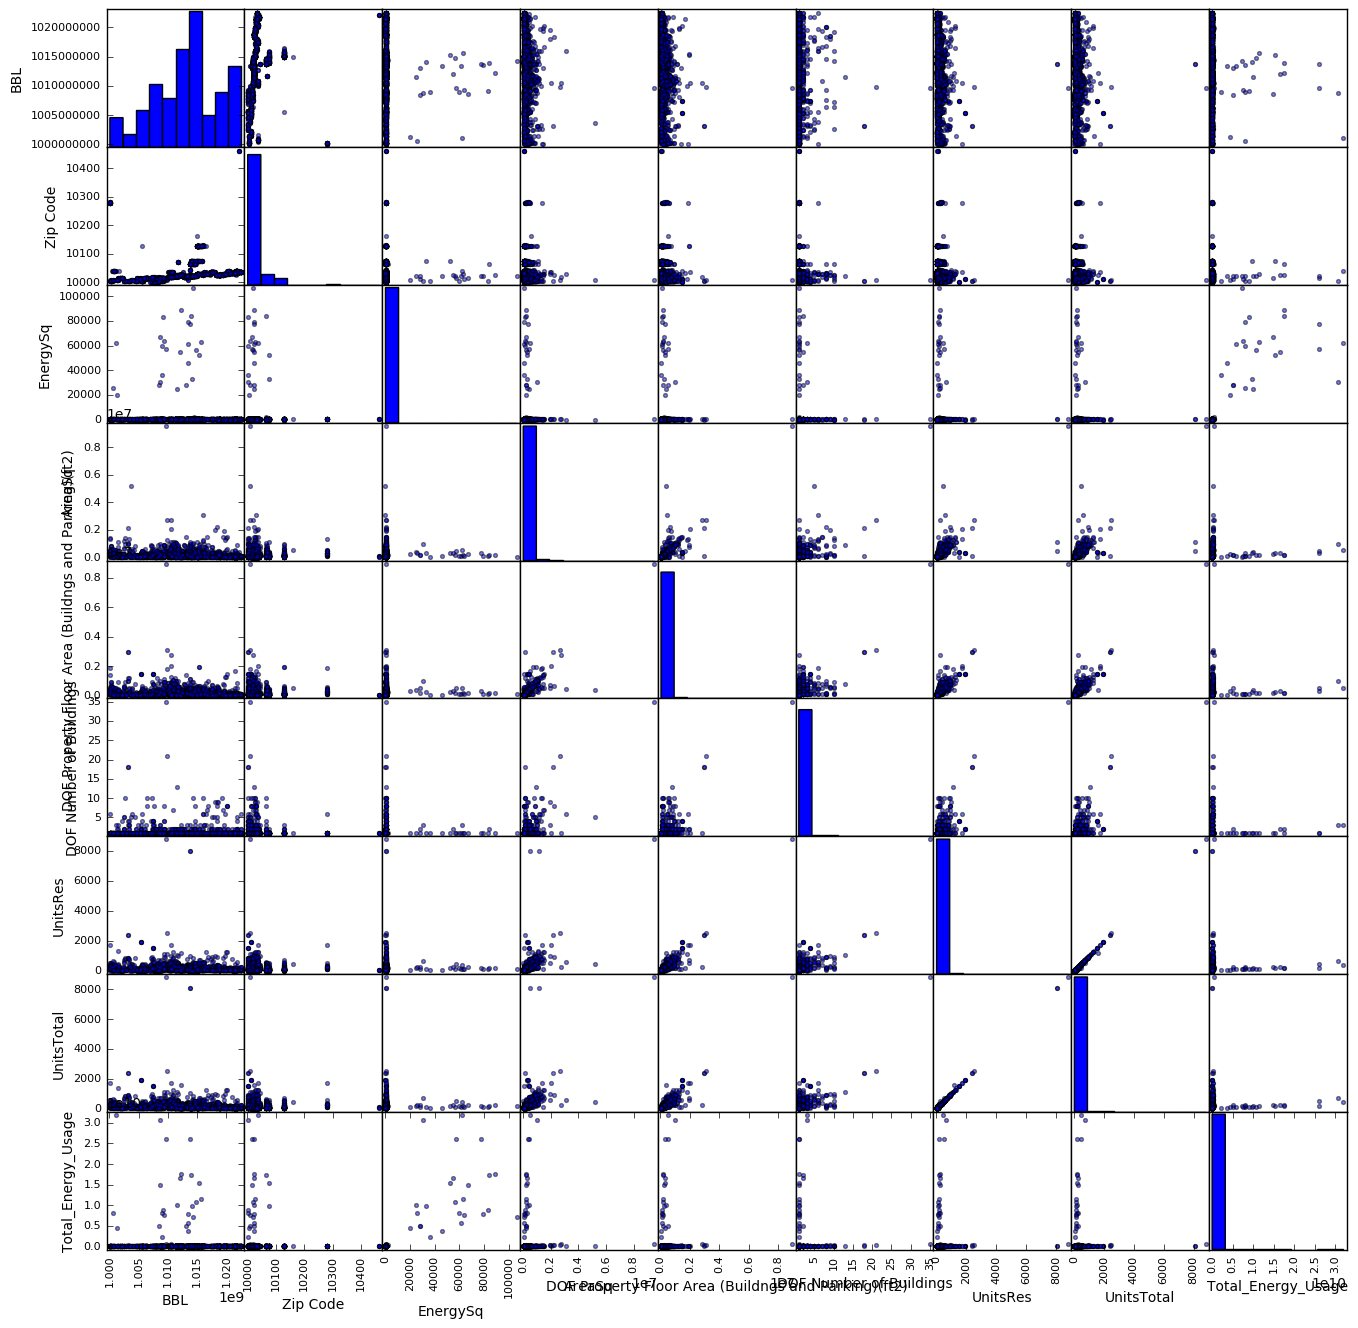

In [79]:
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

## Figure 2. Scatter Matrix of all Numerical Values from Energy Consumption and PLUTO Files
#### Both data sets have been redacted to remove unnecessary values

In [12]:
# renaming columns to make them easier to work with. Must multiply to get total energy
bblnrgdata.rename(columns={"Site EUI(kBtu/ft2)":"EnergySq"
                           ,"Reported Property Floor Area (Building(s)) (ft²)":"AreaSq"}
                  , inplace=True)

In [13]:
#multiple energy by floor area then removing null values
bblnrgdata["Total_Energy_Usage"] = bblnrgdata.apply(lambda x : float(x.EnergySq) * float(
        x.AreaSq), axis=1)
bblnrgdata = bblnrgdata[~bblnrgdata.Total_Energy_Usage.isnull()]

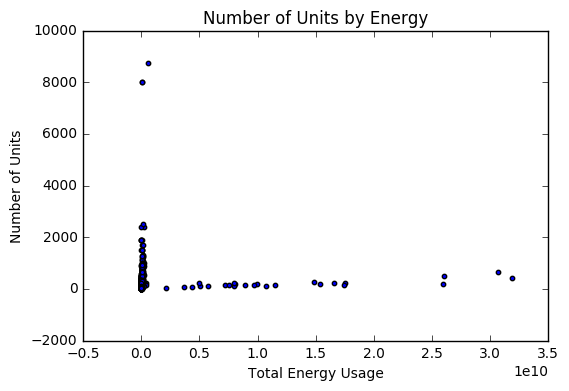

In [84]:
#plotting total energy by residentail units
ax = bblnrgdata.plot.scatter(x='Total_Energy_Usage', y='UnitsRes', s=10)
ax.set_xlabel("Total Energy Usage")
ax.set_ylabel("Number of Units")
ax.set_title("Number of Units by Energy")

## Figure 3. Number of Residential Units By Energy

(1000, 10000000000.0)

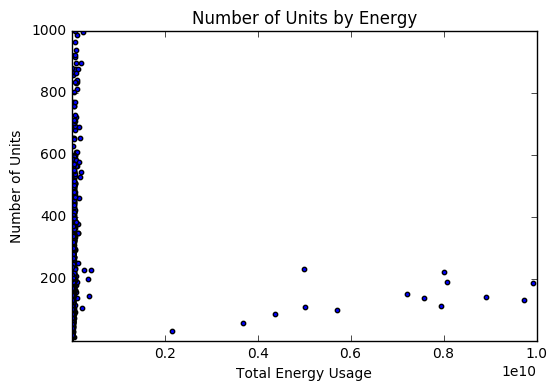

In [85]:
ax = bblnrgdata.plot.scatter(x='Total_Energy_Usage', y='UnitsRes', s=10)
ax.set_xlabel("Total Energy Usage")
ax.set_ylabel("Number of Units")
ax.set_title("Number of Units by Energy")
ax.set_ylim(1,1000)
ax.set_xlim(1000,1e10)

## Figure 4. Number of Residential Units  By Energy With Defined X and Y Axis Limits

In [35]:
#cutting down data set for total energy ove 1,000 and buidings with units over 10
bblnrgdata = bblnrgdata[(bblnrgdata.Total_Energy_Usage > 1000) & (bblnrgdata["UnitsRes"] > 10)]

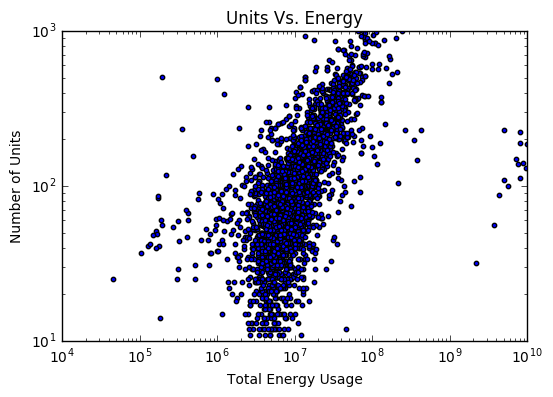

In [86]:
#log plot for units vs energy
ax = bblnrgdata.plot.scatter(y = "UnitsRes", x = "Total_Energy_Usage", s=10, loglog=True)
ax.set_ylim(10,1000)
ax.set_xlim(1e4,1e10)
ax.set_xlabel("Total Energy Usage")
ax.set_ylabel("Number of Units")
ax.set_title("Units Vs. Energy")

## Figure 5. Log Plot of Number of Units vs. Total Energy

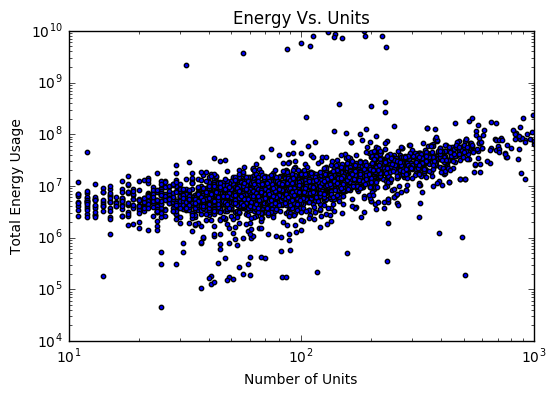

In [87]:
#log plot for energy vs units
ax = bblnrgdata.plot.scatter(y="Total_Energy_Usage", x="UnitsRes", s=10, loglog=True)
ax.set_xlim(10,1000)
ax.set_ylim(1e4,1e10)
ax.set_ylabel("Total Energy Usage")
ax.set_xlabel("Number of Units")
ax.set_title("Energy Vs. Units")

## Figure 6. Log Plot of Total Energy by Number of Units

In [68]:
#fitting a line to energy vs units
X = sm.add_constant(np.log10(bblnrgdata.UnitsRes))
model = sm.OLS(np.log10(bblnrgdata.Total_Energy_Usage), X, missing='drop') 
EnVUn_fit = model.fit()
Y = EnVUn_fit.predict()
y = np.log10(bblnrgdata.Total_Energy_Usage)
#sigma = y/2 ## error term
#chisq = ((y - Y)**2 / sigma**2).sum()

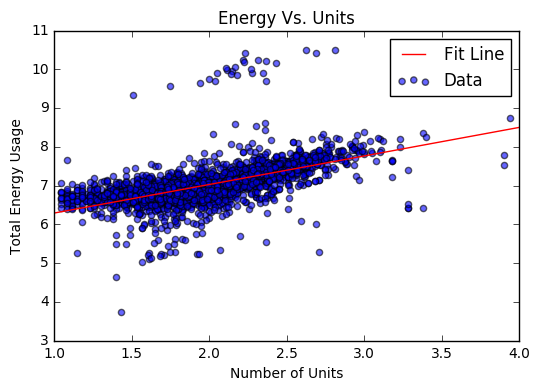

In [109]:
#fit a line to the data points plotted as energy vs units
pl.scatter(log10(bblnrgdata.UnitsRes), log10(bblnrgdata.Total_Energy_Usage),
           alpha=0.6, label="Data")
x_line = np.linspace(1,4,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, EnVUn_fit.predict(x_fit), 'r-', label="Fit Line")
pl.plot()
pl.ylabel("Total Energy Usage")
pl.xlabel("Number of Units")
pl.title("Energy Vs. Units")
plt.xlim([1,4])
pl.legend(loc="best")

## Figure 7. Fit Line For Total Energy By Number of Units

In [82]:
EnVUn_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Energy_Usage   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1887.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        18:52:01   Log-Likelihood:                -1522.2
No. Observations:                3461   AIC:                             3048.
Df Residuals:                    3459   BIC:                             3061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.5525      0.034    163.619      0.000         5.486     5.619
UnitsRes       0.7367      0.017     43.443      0.000         0.703     0.770
==============================================================================
Omnibus:                     2110.786   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            96633.357
Skew:                           2.246   Prob(JB):                         0.00
Kurtosis:                      28.494   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#fitting a line to units vs. energy
X = sm.add_constant(np.log10(bblnrgdata.Total_Energy_Usage))
model = sm.OLS(np.log10(bblnrgdata.UnitsRes), X, missing='drop') 
UnVEn_fit = model.fit()
Y = UnVEn_fit.predict()
y = np.log10(bblnrgdata.UnitsRes)

(5, 9)

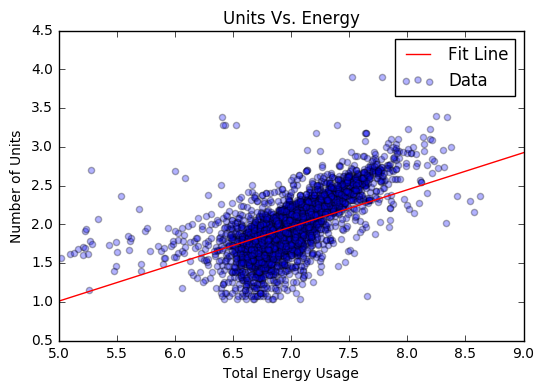

In [110]:
#fit a line to the data points of energy vs units
pl.scatter(log10(bblnrgdata.Total_Energy_Usage), log10(bblnrgdata.UnitsRes), 
           alpha=0.3, label="Data")
x_line = np.linspace(5,9,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, UnVEn_fit.predict(x_fit), 'r-', label="Fit Line")
pl.plot()
pl.ylabel("Number of Units")
pl.xlabel("Total Energy Usage")
pl.title("Units Vs. Energy")
pl.legend(loc='best')
plt.xlim(5,9)

## Figure 8. Fit Line For Number of Units By Total Energy

In [81]:
UnVEn_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UnitsRes   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     1887.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        18:51:32   Log-Likelihood:                -777.79
No. Observations:                3461   AIC:                             1560.
Df Residuals:                    3459   BIC:                             1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                 -1.3890      0.077    -17.949      0.000        -1.541    -1.237
Total_Energy_Usage     0.4792      0.011     43.443      0.000         0.458     0.501
==============================================================================
Omnibus:                      280.358   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1479.588
Skew:                          -0.173   Prob(JB):                         0.00
Kurtosis:                       6.184   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
#Chi-squared for energy vs units
y = np.log10(bblnrgdata.Total_Energy_Usage)
Y = EnVUn_fit.predict()
sigma = y/2 
chisq = ((y - Y)**2 / sigma**2).sum()
print (chisq)

38.1108105813


In [78]:
#Chi-squared for units vs energy
Y = UnVEn_fit.predict()
y = np.log10(bblnrgdata.UnitsRes)
sigma = y/2 
chisq = ((y - Y)**2 / sigma**2).sum()
print (chisq)

420.665629853


### The chi-sqaured values show that the model for energy vs units is a better model than the units vs energy model

In [99]:
#redacting data set to hold only the columns we need
redact = bblnrgdata[["UnitsRes","Total_Energy_Usage"]]
redact = redact.applymap(np.log10)

In [105]:
#create a new column for x squared value
redact["x2"] = redact.UnitsRes**2
redact.head()

,UnitsRes,Total_Energy_Usage,x2
19,1.732394,6.950549,3.001188
20,1.875061,6.811909,3.515855
21,2.107210,6.860458,4.440334
23,1.748188,6.919769,3.056161
24,2.685742,10.415995,7.213209


In [108]:
#Create 2nd degree polynomial for fit
parabola = smf.ols(formula = 'Total_Energy_Usage ~ x2 + UnitsRes', data=redact).fit()

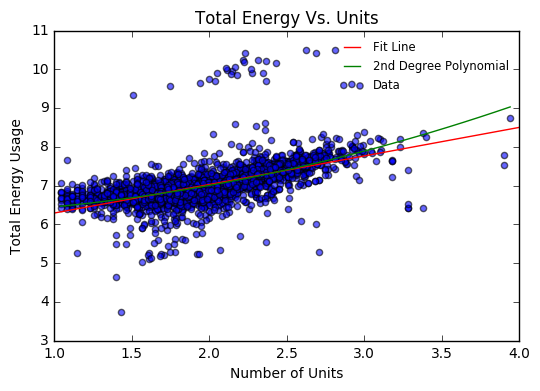

In [124]:
#Plot the parabola for total energy vs residential units
pl.scatter(log10(bblnrgdata.UnitsRes), log10(bblnrgdata.Total_Energy_Usage),
           alpha=0.6, label="Data")
dfnew = pd.DataFrame()
dfnew['UnitsRes'] = np.arange(log10(bblnrgdata.UnitsRes).min(), 
                              log10(bblnrgdata.UnitsRes).max(), 0.1)
dfnew['x2'] = dfnew['UnitsRes'] * dfnew['UnitsRes']
x_line = np.linspace(1,4,1000)
x_fit = sm.add_constant(x_line)
pl.plot(x_line, EnVUn_fit.predict(x_fit), 'r-', label="Fit Line")
pl.plot(dfnew['UnitsRes'], parabola.predict(dfnew), 'g-', label="2nd Degree Polynomial")
pl.plot()
pl.ylabel("Total Energy Usage")
pl.xlabel("Number of Units")
pl.title("Total Energy Vs. Units")
plt.xlim([1,4])
pl.legend(loc="best", fontsize = 'small', frameon=False)

## Figure 9.  Total Energy Vs Number of Units With Both Models
### Included both the fit line and the 2nd degree polynomial line

In [125]:
parabola.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Energy_Usage   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     971.1
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        20:09:26   Log-Likelihood:                -1504.3
No. Observations:                3461   AIC:                             3015.
Df Residuals:                    3458   BIC:                             3033.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.2299      0.118     52.823      0.000         5.999     6.461
x2             0.1669      0.028      5.995      0.000         0.112     0.222
UnitsRes       0.0519      0.115      0.450      0.653        -0.174     0.278
==============================================================================
Omnibus:                     2111.535   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106260.647
Skew:                           2.217   Prob(JB):                         0.00
Kurtosis:                      29.781   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
#LR test
LR = -2*((-1522.2) - (-1504.3))
LR

35.80000000000018

### The null hypotesis is that model 1 (linear fit) is a better fit than model 2 (polynomial fit). Degrees of freedom is equal to 1 and according to the table provided our critical value is 3.84. As LR is larger than 3.84 we can reject the null hypothesis

In [115]:
smf.ols(formula = 'Total_Energy_Usage ~ x2 + UnitsRes', 
        data=redact).fit().compare_lr_test(smf.ols(formula = 'Total_Energy_Usage ~  UnitsRes', 
        data=redact).fit())

(35.782882335342038, 2.2057743562761581e-09, 1.0)